# **Pengenalan** **Data**

##Latihan Konversi Pandas Dataframe

In [3]:
import os
os.listdir('sample_data')

['README.md',
 'anscombe.json',
 'california_housing_train.csv',
 'mnist_test.csv',
 'california_housing_test.csv',
 'mnist_train_small.csv']

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


## Data Preparation dengan Normalization dan Standardization

###Normalization

In [6]:
from sklearn.preprocessing import MinMaxScaler
data = [[12000000, 33], [35000000, 45], [4000000, 23], [6500000, 26], [9000000, 29]]

In [7]:
scaler = MinMaxScaler()
scaler.fit(data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [8]:
print(scaler.transform(data))

[[0.25806452 0.45454545]
 [1.         1.        ]
 [0.         0.        ]
 [0.08064516 0.13636364]
 [0.16129032 0.27272727]]


###Standardization

In [9]:
from sklearn import preprocessing
data = [[12000000, 33], [35000000, 45], [4000000, 23], [6500000, 26], [9000000, 29]]

In [10]:
scaler =preprocessing.StandardScaler().fit(data)

In [11]:
data = scaler.transform(data)
data

array([[-0.11638732,  0.23521877],
       [ 1.94277296,  1.80334389],
       [-0.83261698, -1.07155217],
       [-0.60879521, -0.67952089],
       [-0.38497344, -0.28748961]])

##Datasets

###Training Set dan Test Set

In [12]:
from sklearn.model_selection import train_test_split
 
X_data = range(10)
y_data = range(10)
 
print("random_state ditentukan")
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 42)
    print(y_test)
 
 
print("random_state tidak ditentukan")
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = None)
    print(y_test)

random_state ditentukan
[8, 1, 5]
[8, 1, 5]
[8, 1, 5]
random_state tidak ditentukan
[9, 4, 3]
[8, 6, 5]
[0, 6, 5]


##Latihan SKLearn Train Test Split

In [13]:
import sklearn
from sklearn import datasets

In [14]:
# load iris dataset
iris = datasets.load_iris()

In [15]:
# pisahkan atribut dan label pada iris dataset
x=iris.data
y=iris.target

In [16]:
from sklearn.model_selection import train_test_split

# membagi dataset menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
# menghitung panjang/jumlah data pada x_test
len(x_test)

30

##Latihan SKLearn Cross Validation Split

In [18]:
import sklearn
from sklearn import datasets

# Load iris dataset
iris = datasets.load_iris()

In [19]:
# mendefinisikan atribut dan label pada dataset
x=iris.data
y=iris.target

In [20]:
from sklearn import tree

# membuat model dengan decision tree ckassifier
clf = tree.DecisionTreeClassifier()

In [21]:
from sklearn.model_selection import cross_val_score

# mengevalusasi perfoma model dengan cross_val_score
scores = cross_val_score(clf, x, y, cv=5)

In [ ]:
scores

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

#**Supervised** **dan** **Unsupervised** **Learning**


##Latihan SKLearn Decision Tree

In [23]:
import pandas as pd
from sklearn.datasets import load_iris

# Membaca file iris.csv
iris = pd.read_csv('Iris.csv')

In [24]:
# Melihat Informasi dataset pada 5 baris pertama
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
# Menghilangkan kolom yang tidak penting
iris.drop('Id',axis=1,inplace=True)

In [26]:
# Memisahkan atribut dan label
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']

In [27]:
from sklearn.tree import DecisionTreeClassifier
 
# membuat model Decision Tree
tree_model = DecisionTreeClassifier() 
 
# melakukan pelatihan model terhadap data
tree_model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
# prediksi model dengan tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
tree_model.predict([[6.2, 3.4, 5.4, 2.3]])


array(['Iris-virginica'], dtype=object)

In [30]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True
)

##Latihan SKLearn Linear Regression

In [31]:
import numpy as np
 
#buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])
 
#data harga rumah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

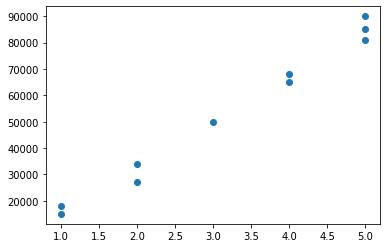

In [32]:
# menampilkan scatter plot dari dataset
import matplotlib.pyplot as plt
%matplotlib inline
 
plt.scatter(bedrooms, house_price)

In [33]:
from sklearn.linear_model import LinearRegression
 
# latih model dengan Linear Regression.fit()
bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

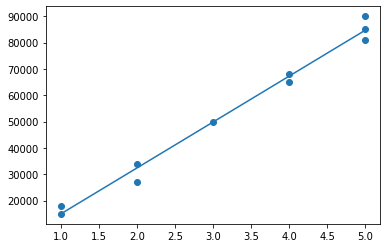

In [34]:
# menampilkan plot hubungan antara jumlah kamar dengan harga rumah
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))

##Latihan SKLearn Logistic Regression

In [35]:
import pandas as pd
 
# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('Social_Network_Ads.csv')

In [36]:
import pandas as pd
 
df = pd.read_csv('Social_Network_Ads.csv')

In [37]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [39]:
# drop kolom yang tidak diperlukan
data = df.drop(columns=['User ID'])
 
# jalankan proses one-hot encoding dengan pd.get_dummies()
data = pd.get_dummies(data)
data

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [40]:
# pisahkan atribut dan label
predictions = ['Age' , 'EstimatedSalary' , 'Gender_Female' , 'Gender_Male']
X = data[predictions]
y = data['Purchased'] 

In [42]:
# lakukan normalisasi terhadap data yang kita miliki
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns= X.columns)
scaled_data.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204


In [43]:
from sklearn.model_selection import train_test_split
 
# bagi data menjadi train dan test untuk setiap atribut dan label
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=1)

In [44]:
from sklearn import linear_model
 
# latih model dengan fungsi fit
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
from sklearn.preprocessing import StandardScaler
 
# uji akurasi model
model.score(X_test, y_test)

0.825

##Latihan SKLearn K-means

In [46]:
import pandas as pd
 
#ubah file csv menjadi dataframe
df = pd.read_csv('Mall_Customers.csv')
 
# tampilkan 3 baris pertama
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [47]:
# ubah nama kolom
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})
 
# ubah data kategorik mmenjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
 
# tampilkan data yang sudah di preprocess
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [48]:
from sklearn.cluster import KMeans
 
# menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)
 
#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

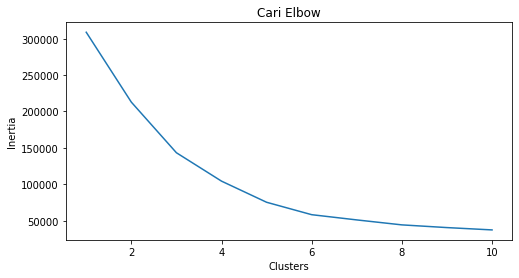

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


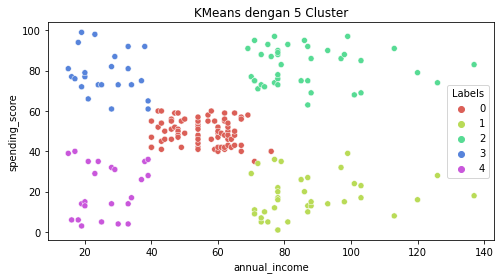

In [50]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)
 
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_
 
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()

##Latihan SKLearn PCA 

In [51]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
 
iris = datasets.load_iris()
atribut = iris.data
label = iris.target
 
# bagi dataset menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(
    atribut, label, test_size=0.2)

In [52]:
from sklearn import tree
 
decision_tree = tree.DecisionTreeClassifier()
model_pertama = decision_tree.fit(X_train, y_train)
model_pertama.score(X_test, y_test)

0.8666666666666667

In [53]:
from sklearn.decomposition import PCA
 
# membuat objek PCA dengan 4 principal component
pca = PCA(n_components=4)
 
# mengaplikasikan PCA pada dataset
pca_attributes = pca.fit_transform(X_train)
 
# melihat variance dari setiap atribut
pca.explained_variance_ratio_

array([0.92832397, 0.05168386, 0.01502093, 0.00497123])

In [54]:
# PCA dengan 2 principal component
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [55]:
# uji akurasi classifier
model2 = decision_tree.fit(X_train_pca, y_train)
model2.score(X_test_pca, y_test)

0.5333333333333333

#**Support Vector Machine** 

##Latihan SKLearn SVM untuk Klasifikasi

In [56]:
import pandas as pd
 
df = pd.read_csv('diabetes.csv')

In [57]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [59]:
# memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel
X = df[df.columns[:8]]
 
# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Outcome']

In [60]:
from sklearn.preprocessing import StandardScaler
 
# standarisasi nilai-nilai dari dataset
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [61]:
from sklearn.model_selection import train_test_split
 
# memisahkan data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [62]:
from sklearn.svm import SVC
 
# membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
# Menampilkan skor akurasi prediksi
clf.score(X_test, y_test)

0.7559055118110236

##Latihan SKLearn SVR


In [65]:
import pandas as pd

# membaca dataset dan menghubahnya menjadi dataframe
data = pd.read_csv('Salary_Data.csv')

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [67]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [68]:
import numpy as np
 
# memisahkan atribut dan label
X = data['YearsExperience']
y = data['Salary']
 
# mengubah bentuk atribut
X = X[:,np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [69]:
from sklearn.svm import SVR
 
# membangun model dengan parameter C, gamma, dan kernel
model  = SVR(C=1000, gamma=0.05, kernel='rbf')
 
# melatih model dengan fungsi fit
model.fit(X,y)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

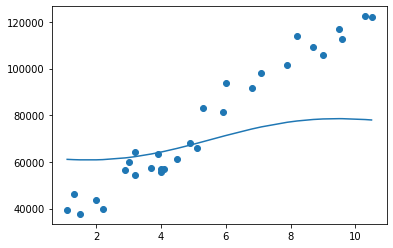

In [70]:
import matplotlib.pyplot as plt
 
# memvisualisasikan model
plt.scatter(X, y)
plt.plot(X, model.predict(X))

#**Dasar-Dasar Machine Learning**

##Latihan SKLearn dengan Teknik Grid Search

In [71]:
import pandas as pd
 
# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('Salary_Data.csv')

In [72]:
import numpy as np
 
# memisahkan atribut dan label
X = data['YearsExperience']
y = data['Salary']
 
# mengubah bentuk atribut
X = X[:,np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
 
# membangun model dengan parameter C, gamma, dan kernel
model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C':     [1000, 10000, 100000],
    'gamma': [0.5, 0.05,0.005]
}
grid_search = GridSearchCV(model, parameters)

In [108]:
grid_search.fit(X,y)

print("SVR GridSearch score: "+str(grid_search.best_score_))
print("SVR GridSearch params: ")
print(grid_search.best_params_)

SVR GridSearch score: 0.046902312105593216
SVR GridSearch params: 
{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


In [89]:
# membuat model SVM baru dengan parameter terbaik hasil grid search
model_baru  = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)

SVR(C=100000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.005,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

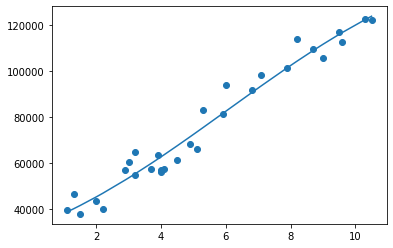

In [107]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))

##Menambahkan/Mengurangi Fitur

In [91]:
import pandas as pd 
 
Developer = pd.DataFrame({'Name': ['Isyana Saraswati', 'Nicholas Saputra', 'Raisa Andriana'], 
        'Age':[30, 36, 32]}) 
print("Machine Learning Developer di Indonesia :\n", Developer) 
 
Developer[['First','Last']] = Developer.Name.str.split(expand=True) 
print("\n Split kolom 'Name', lalu tambahkan kedua kolom : \n", Developer)

Machine Learning Developer di Indonesia :
                Name  Age
0  Isyana Saraswati   30
1  Nicholas Saputra   36
2    Raisa Andriana   32

 Split kolom 'Name', lalu tambahkan kedua kolom : 
                Name  Age     First       Last
0  Isyana Saraswati   30    Isyana  Saraswati
1  Nicholas Saputra   36  Nicholas    Saputra
2    Raisa Andriana   32     Raisa   Andriana


#**Tensor Flow**

##Latihan Membuat Model Klasifikasi Gambar

In [92]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [93]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2021-06-15 12:43:27--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   463KB/s    in 69s     

2021-06-15 12:44:37 (993 KB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [96]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [97]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [98]:
os.listdir('/tmp/images/val')

['messy', 'clean']

In [99]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')
 
# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')
 
# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')
 
# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [100]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [101]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [102]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [103]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [104]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 8s - loss: 0.7291 - accuracy: 0.5400 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 6s - loss: 0.6934 - accuracy: 0.4800 - val_loss: 0.6923 - val_accuracy: 0.7000
Epoch 3/20
25/25 - 7s - loss: 0.7070 - accuracy: 0.6000 - val_loss: 0.6920 - val_accuracy: 0.5500
Epoch 4/20
25/25 - 6s - loss: 0.6936 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/20
25/25 - 7s - loss: 0.6927 - accuracy: 0.5200 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 6/20
25/25 - 6s - loss: 0.6924 - accuracy: 0.5100 - val_loss: 0.6884 - val_accuracy: 0.7000
Epoch 7/20
25/25 - 6s - loss: 0.6688 - accuracy: 0.5700 - val_loss: 0.7337 - val_accuracy: 0.5000
Epoch 8/20
25/25 - 6s - loss: 0.6957 - accuracy: 0.5900 - val_loss: 0.6156 - val_accuracy: 0.7000
Epoch 9/20
25/25 - 6s - loss: 0.6243 - accuracy: 0.6600 - val_loss: 0.5569 - val_accuracy: 0.7500
Epoch 10/20
25/25 - 6s - loss: 0.6124 - accuracy: 0.6800 - val_loss: 0.6976 - val_accuracy: 0.5000
Epoch 11/20
25/25 -

Saving tes.jpg to tes (1).jpg
tes.jpg
messy


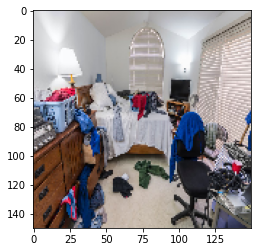

In [105]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')